In [1]:
import sys
sys.path.append('/home/yja6qa/arepo_package/')
import arepo_package
import scipy.interpolate
radiative_efficiency=0.2
import h5py
%pylab inline
import os
import numpy as np
from brahma_analysis import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMass'
redshifts = [5,0]
part=4
Prop1list,Prop2list,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type=part)

In [3]:
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends(Prop1list,Prop2list,redshifts,limits,bins=8)

/sfs/qumulo/qhome/yja6qa/arepo_package/brahma_analysis.py:168: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/qumulo/qhome/yja6qa/arepo_package/brahma_analysis.py:169: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/ju

(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'Z=5'}>, <Axes: title={'center': 'Z=0'}>],
       dtype=object))

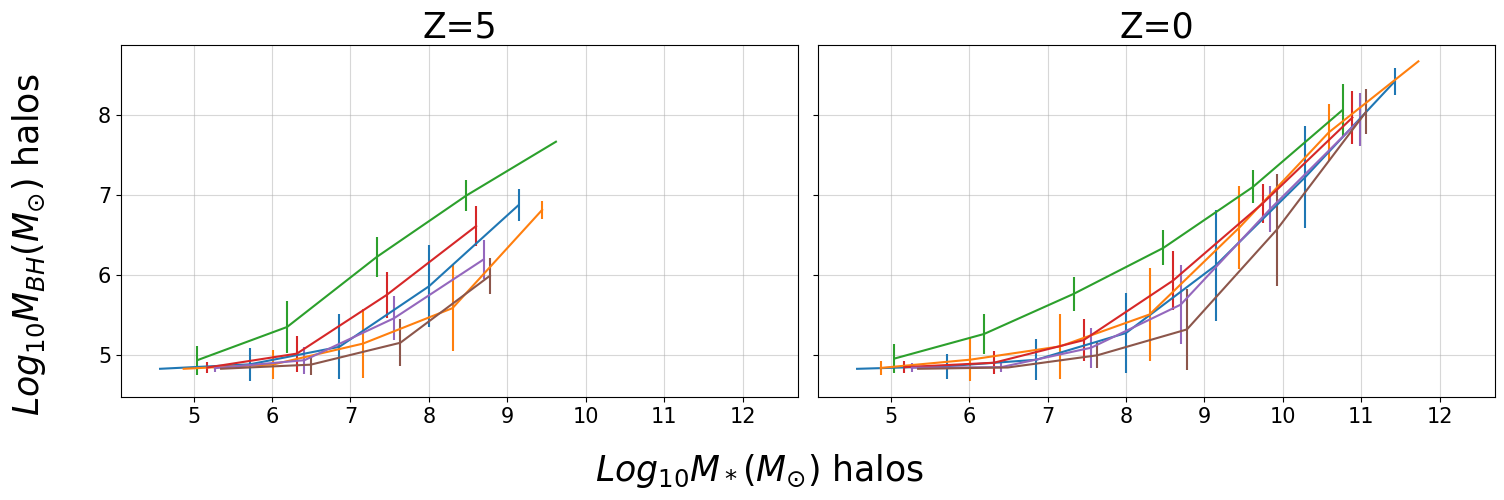

In [4]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}M_{BH} (M_{\odot})$ halos']

plot_brahma(AllBoxMeans,AllBoxStdDevs,Xpoints,redshifts,legend_names,axislabels,savefig = False)

# Now: Stellar Mass vs BH Accretion Rate

In [5]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=4

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
SMlist,BH_Mdotlist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type,conversion2=conversion2)


In [6]:
MDotMeans,MdotStdDevs,MdotXpoints = mean_trends(SMlist,BH_Mdotlist,redshifts,limits,bins=8)

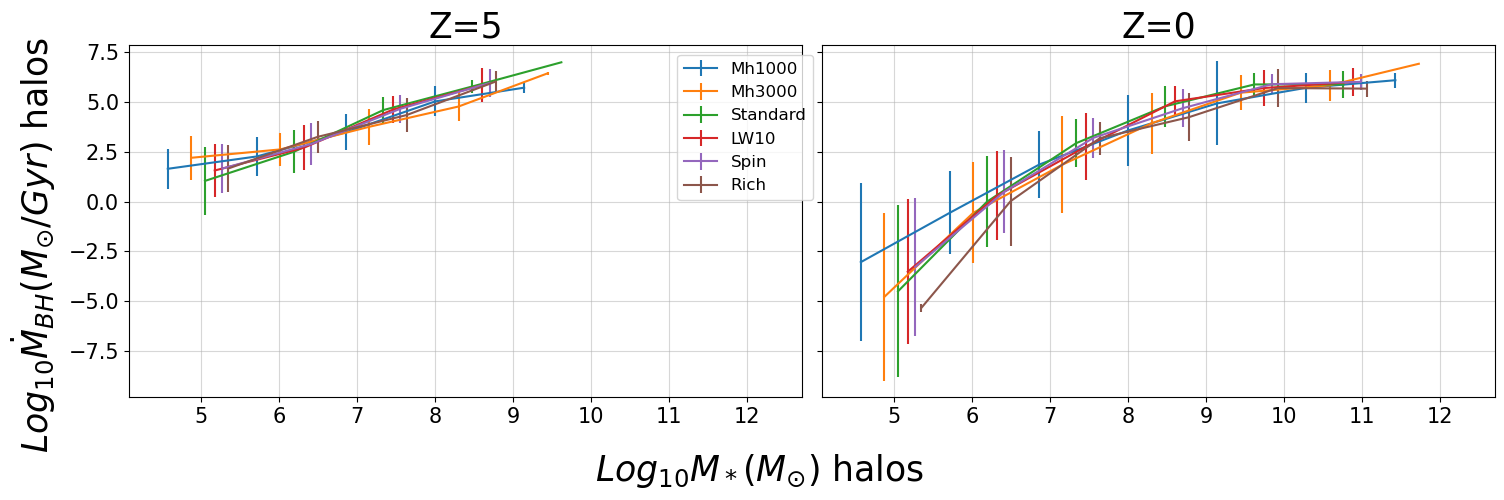

In [7]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}\dot{M}_{BH} (M_{\odot}/Gyr)$ halos']

f,axes = plot_brahma(MDotMeans,MdotStdDevs,MdotXpoints,redshifts,legend_names,axislabels,savefig = 'BHMdot_Mstars.png')
f.legend(loc = (0.45,0.6),fontsize = 12)

## Converting Mdot to L

From https://ui.adsabs.harvard.edu/abs/2024MNRAS.529.3768B/abstract:

Accreting black holes radiate at bolometric luminosities given by

$L_{bol} = \epsilon_r * \dot{M}_{BH} * c^2$

where $\epsilon_r = 0.2$ is the radiative efficiency.

In [8]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=4

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
SMlist,Lbollist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,
                                                     part_type,conversion2=conversion2,Lbol=[False,True])


In [9]:
LbolMeans,LbolStdDevs,LbolXpoints = mean_trends(SMlist,Lbollist,redshifts,limits,bins=8)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


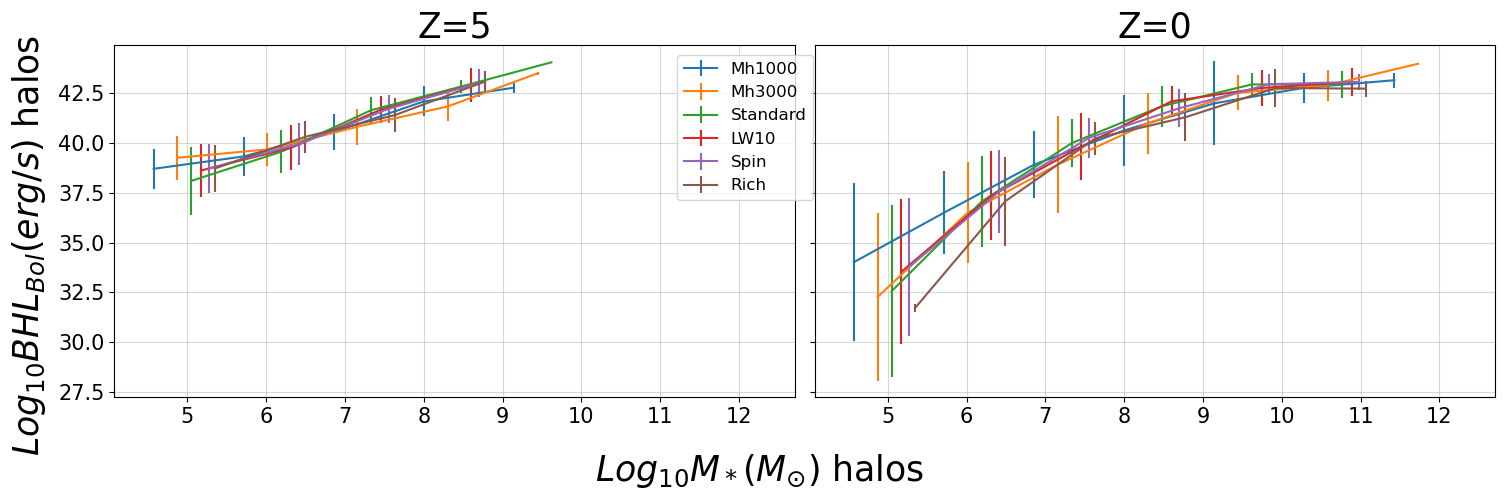

In [10]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}BH L_{Bol} (erg/s)$ halos']

f,axes = plot_brahma(LbolMeans,LbolStdDevs,LbolXpoints,redshifts,legend_names,axislabels,savefig = 'BH_LBol_Mstars.png')
f.legend(loc = (0.45,0.6),fontsize = 12)

# Now, BH Mass vs BH Accretion Rate

In [5]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=5 # We want BH mass now

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
BHMlist,BH_Mdotlist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type,conversion2=conversion2)


In [6]:
BHMMeans,MdotStdDevs,MdotXpoints = mean_trends(BHMlist,BH_Mdotlist,redshifts,limits,bins=8)

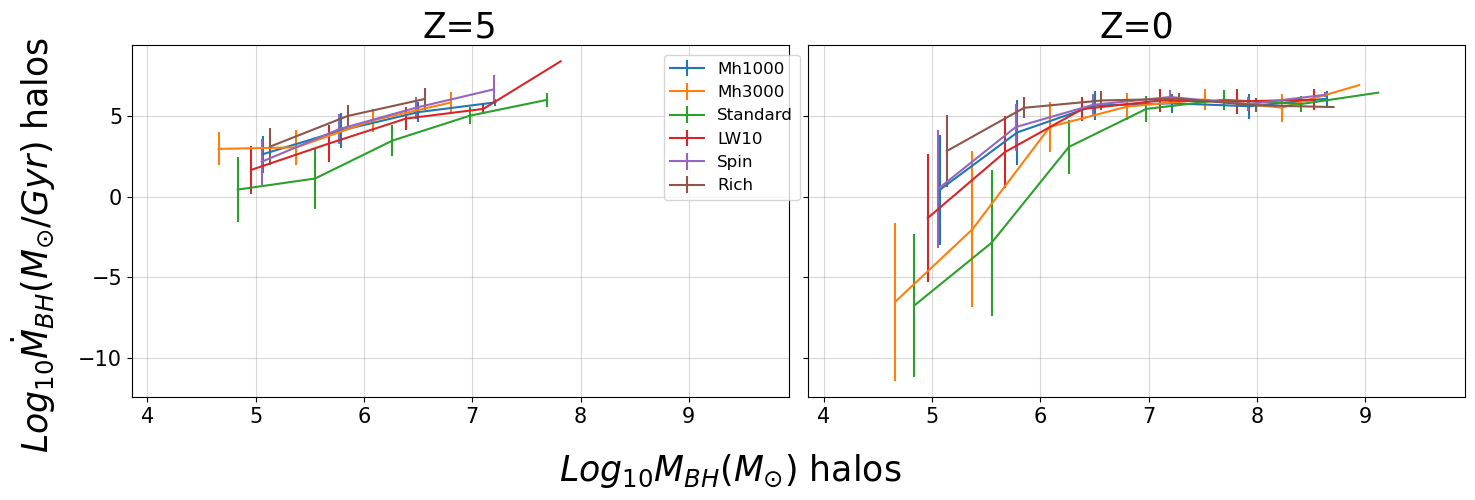

In [11]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_{BH} (M_{\odot})$ halos','$Log_{10}\dot{M}_{BH} (M_{\odot}/Gyr)$ halos']

f,axes = plot_brahma(BHMMeans,MdotStdDevs,MdotXpoints,redshifts,legend_names,axislabels,savefig = 'BHMdot_MBH.png')
f.legend(loc = (0.45,0.6),fontsize = 12)